In [2]:
import pandas as pd

In [3]:
# Load CSV and drop the 'id' column
train_csv = pd.read_csv("train_images.csv")
test_csv = pd.read_csv("test_images_path.csv")
test_csv = test_csv.drop(columns=['id'])

In [4]:
print(((train_csv['label']).value_counts()).describe())
len(train_csv['label'].unique())
#train_csv.count()

count    200.00000
mean      19.63000
std        8.39377
min        5.00000
25%       12.75000
50%       20.00000
75%       27.00000
max       35.00000
Name: count, dtype: float64


200

In [4]:
print(((test_csv['label']).value_counts()).describe())
len(test_csv['label'].unique())


count       1.0
mean     4000.0
std         NaN
min      4000.0
25%      4000.0
50%      4000.0
75%      4000.0
max      4000.0
Name: count, dtype: float64


1

In [5]:
for _, row in train_csv.iterrows():
        print('here'+row[0])

C:\Users\31610\AppData\Local\Temp\ipykernel_21856\799708236.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('here'+row[0])


here/train_images/1.jpg
here/train_images/2.jpg
here/train_images/3.jpg
here/train_images/4.jpg
here/train_images/5.jpg
here/train_images/6.jpg
here/train_images/7.jpg
here/train_images/8.jpg
here/train_images/9.jpg
here/train_images/10.jpg
here/train_images/11.jpg
here/train_images/12.jpg
here/train_images/13.jpg
here/train_images/14.jpg
here/train_images/15.jpg
here/train_images/16.jpg
here/train_images/17.jpg
here/train_images/18.jpg
here/train_images/19.jpg
here/train_images/20.jpg
here/train_images/21.jpg
here/train_images/22.jpg
here/train_images/23.jpg
here/train_images/24.jpg
here/train_images/25.jpg
here/train_images/26.jpg
here/train_images/27.jpg
here/train_images/28.jpg
here/train_images/29.jpg
here/train_images/30.jpg
here/train_images/31.jpg
here/train_images/32.jpg
here/train_images/33.jpg
here/train_images/34.jpg
here/train_images/35.jpg
here/train_images/36.jpg
here/train_images/37.jpg
here/train_images/38.jpg
here/train_images/39.jpg
here/train_images/40.jpg
here/trai

DATA PREPROCESSING

    Resize images (e.g., 224x224).
    Normalize pixel values to range [0, 1].
    Apply data augmentation (rotation, flipping, etc.). 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:

def preprocess_data(csv_data, base_folder='', img_size=(224, 224)):
    """
    Preprocess images based on CSV paths and labels.
    Args:
        csv_data: Pandas DataFrame with 'path' and 'label' columns.
        base_folder: Base folder containing the images (e.g., "train_images").
        img_size: Target size for resizing images.
    Returns:
        images: Numpy array of image data.
        labels: Numpy array of labels.
    """
    images = []
    labels = []
    for _, row in csv_data.iterrows():
        img_path = (base_folder + row[0])  # Add base folder to path
        label = row[1]  # Label

        # Load and preprocess the image
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
        images.append(img_array)
        labels.append(label)
    
    return np.array(images), np.array(labels)


# Preprocess training data
train_images, train_labels = preprocess_data(train_csv, base_folder="C:/Users/31610/Documents/GitHub/AML/train_images")

# Preprocess testing data
#test_images, test_labels = preprocess_data(test_csv, base_folder="C:/Users/martj/Desktop/Applied ML/AML-assignment/test_images")


# Convert labels to one-hot encoding
num_classes = len(np.unique(train_labels))

# Adjust labels to 0-based indexing
train_labels = train_labels - 1
print(len(train_labels))
train_labels = to_categorical(train_labels, num_classes=200)
#test_labels = to_categorical(test_labels, num_classes=num_classes)


C:\Users\31610\AppData\Local\Temp\ipykernel_21856\205544565.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  img_path = (base_folder + row[0])  # Add base folder to path
C:\Users\31610\AppData\Local\Temp\ipykernel_21856\205544565.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[1]  # Label


3926


In [7]:
# Find unique one-hot encoded vectors
unique_vectors = np.unique(train_labels, axis=0)
print(len(unique_vectors))  # This will give the number of unique vectors


200


In [8]:
# First, split into training + validation and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

# Next, split the training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.111, random_state=42, stratify=train_labels
)  # 0.25 x 0.8 = 0.2 of the original data

In [9]:
print("train data size", len(train_labels))
print("test data size", len(test_labels))
print("validation data size", len(val_labels))

train data size 2791
test data size 786
validation data size 349


In [10]:
# Find unique one-hot encoded vectors
unique_vectors = np.unique(train_labels, axis=0)
print("unique labels in training data", len(unique_vectors))  # This will give the number of unique vectors
# Find unique one-hot encoded vectors
unique_vectors = np.unique(test_labels, axis=0)
print("unique labels in test data", len(unique_vectors))  # This will give the number of unique vectors
# Find unique one-hot encoded vectors
unique_vectors = np.unique(val_labels, axis=0)
print("unique labels in validation data", len(unique_vectors))  # This will give the number of unique vectors

unique labels in training data 200
unique labels in test data 200
unique labels in validation data 190


**Define data generators**

In [11]:
####Can mess with this too, although I did not see much change when doing so 
train_datagen = ImageDataGenerator(
    #Randomly rotates the image within a range of ±20 degrees
    rotation_range=20,
    #Shifts the image horizontally by a random fraction (up to 20% of the width)
    width_shift_range=0.2,
    #Shifts the image vertically by a random fraction (up to 20% of the height)
    height_shift_range=0.2,
    #Applies a random shearing transformation within 0.2 radians
    shear_range=0.2,
    #Zooms in or out on the image randomly by up to 20%
    zoom_range=0.2,
    # Randomly flips the image horizontally
    horizontal_flip=True,
    #Fills in pixels that are generated due to transformations using the nearest pixel values
    fill_mode='nearest'
)

# Apply data augmentation to training images only
train_generator = train_datagen.flow(
    train_images, train_labels, batch_size=32
)

val_datagen = ImageDataGenerator()  # No augmentation for validation
val_generator = val_datagen.flow(
    val_images, val_labels, batch_size=32
)


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array


# Build a simple CNN model
# Build Model with MobileNetV2
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Callbacks
callbacks = [
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor="val_loss", patience=5, verbose=1, restore_best_weights=True)
]

In [14]:
# Fine-tune the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

# Fine-Tuning
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile for fine-tuning
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Fine-tune the model
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)


c:\Users\31610\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 92s 987ms/step - accuracy: 0.0189 - loss: 5.3657 - val_accuracy: 0.1003 - val_loss: 4.6463 - learning_rate: 0.0010
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 85s 970ms/step - accuracy: 0.0877 - loss: 4.5029 - val_accuracy: 0.2235 - val_loss: 3.7474 - learning_rate: 0.0010
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 87s 989ms/step - accuracy: 0.1795 - loss: 3.7654 - val_accuracy: 0.2521 - val_loss: 3.2884 - learning_rate: 0.0010
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 83s 945ms/step - accuracy: 0.2219 - loss: 3.3630 - val_accuracy: 0.3467 - val_loss: 2.9583 - learning_rate: 0.0010
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.2748 - loss: 2.9940 - val_accuracy: 0.3582 - val_loss: 2.7052 - learning_rate: 0.0010
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 82s 941ms/step - accuracy: 0.3038 - loss: 2.7919 - val_accuracy: 0.4069 - val_loss: 2.5669 - learning_rate: 0.0010
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 83s 947ms/step - accuracy: 0.3299 - loss: 2.615

In [15]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=32)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 563ms/step - accuracy: 0.4545 - loss: 2.0393
Test Accuracy: 43.89%


In [16]:
model.save('bird_species_classifier.h5')


In [26]:
def predict_pipeline(image_path):
    # Define the input image size
    input_shape = (224, 224)
            
    # load image data
    img = load_img(image_path, target_size=input_shape)
            
    # convert image to array
    x = img_to_array(img)
            
    # preprocess the image using efficientnet preprocessor
    x = preprocess_input(x)

    # Make the prediction
    preds = model.predict(np.array([x]))

    # get the index of the predicted class
    index = np.argmax(preds)
    
    # get the predicted class name
    predicted_class = labels[index]

    # Return prediced_class
    return predicted_class


NameError: name 'valid' is not defined

<Figure size 640x480 with 0 Axes>

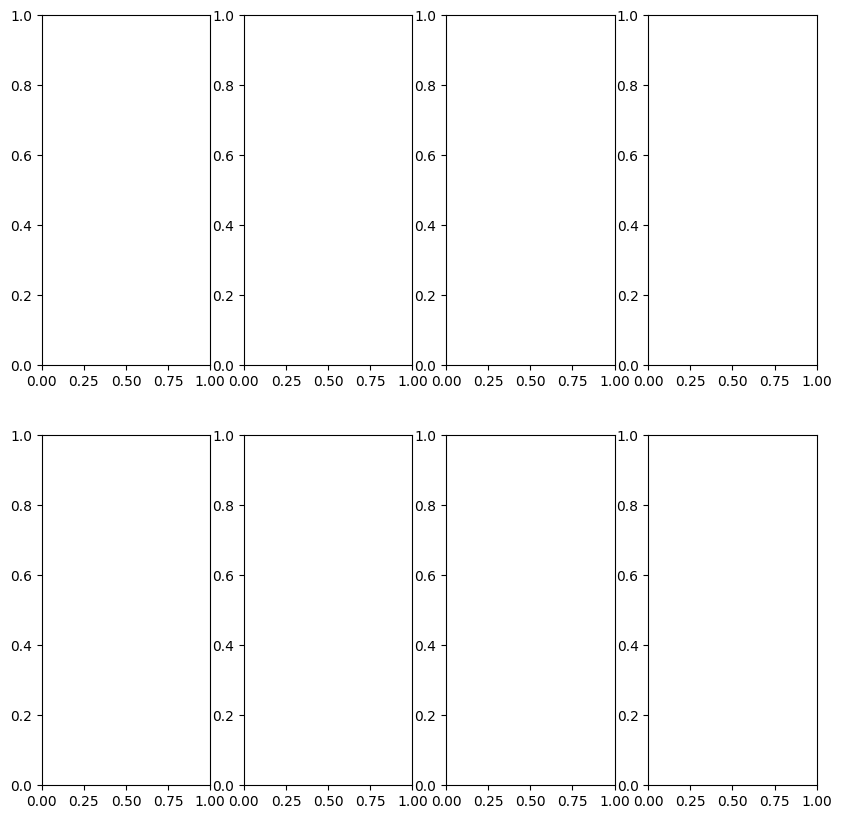

In [27]:
import random
n_rows = 2
n_cols = 4
# Here we are using gcf to clen the plot if the cell is being runned 2 or more times
fig = plt.gcf()

# Create a figure and subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

# set size of each image
fig.set_size_inches(10, 10)

species = []
img_path = {}

# choosing a image at random
for i in range(n_rows*n_cols):
    species.append(random.choice(os.listdir(valid)))

for bird in species:
    img_choice = random.choice(os.listdir(os.path.join(train,bird)))
    full_path = os.path.join(train,bird,img_choice)
    img_path[bird] = full_path

# reading and printing the image
i = 0
for key in img_path.keys():
    sp = plt.subplot(n_rows, n_cols, i + 1)
    img = mimg.imread(img_path[key])
    predicted = predict_pipeline(img_path[key])
    sp.set_title('Actual: '+str(key)+'\n'+'Predicted: '+str(predicted), fontsize=8)
    sp.axis('off')
    plt.imshow(img)
    i += 1

plt.tight_layout()

In [36]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Prediction Pipeline
def predict_pipeline(image_path):
    try:
        # Load and preprocess image
        input_shape = (224, 224)
        img = load_img(image_path, target_size=input_shape)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array /= 255.0  # Normalize pixel values
        
        # Predict
        preds = model.predict(img_array)
        index = np.argmax(preds)  # Get index of the highest probability
        
        # Map index to class name
        class_names = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping
        predicted_class = class_names[index]
        return predicted_class
    except Exception as e:
        print(f"Error during prediction: {e}")
        return None

# Directory and output file
image_dir = "C:/Users/31610/Documents/GitHub/AML/train_images/train_images"
output_csv = "predictions.csv"

# Initialize predictions list
predictions = []

# Iterate through images
if not os.path.isdir(image_dir):
    print(f"Error: Directory {image_dir} does not exist!")
else:
    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        if os.path.isfile(image_path):  # Ensure it's a file
            try:
                predicted_label = predict_pipeline(image_path)
                if predicted_label is not None:
                    predictions.append({"id": image_file, "label": predicted_label})
                else:
                    print(f"Prediction failed for {image_file}.")
            except Exception as e:
                print(f"Error processing {image_file}: {e}")
        else:
            print(f"Skipped non-file: {image_file}")

# Save Predictions
if predictions:
    df = pd.DataFrame(predictions)
    df.to_csv(output_csv, index=False)
    print(f"Predictions saved to {output_csv}")
else:
    print("No predictions were made. Check the above logs for issues.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Error during prediction: 'NumpyArrayIterator' object has no attribute 'class_indices'
Prediction failed for 1.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Error during prediction: 'NumpyArrayIterator' object has no attribute 'class_indices'
Prediction failed for 10.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Error during prediction: 'NumpyArrayIterator' object has no attribute 'class_indices'
Prediction failed for 100.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Error during prediction: 'NumpyArrayIterator' object has no attribute 'class_indices'
Prediction failed for 1000.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Error during prediction: 'NumpyArrayIterator' object has no attribute 'class_indices'
Prediction failed for 1001.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Error during prediction: 'NumpyArrayIterator' object has no attribute 'class_indices'
Prediction failed for 1002.jpg.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Error during prediction: 'NumpyAr

KeyboardInterrupt: 